# PyTorch Autograd

In [10]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt

In [3]:
dtype = torch.float
device = torch.device("cpu")

## Generate Data

Genearte data using linspace 

`torch.linspace(start, end, steps, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)` → Tensor

In [25]:
x = torch.linspace(-math.pi,math.pi,2000,device=device, dtype=dtype)
y = torch.sin(x)

In [26]:
print("Shape of x", x.shape)
print("Shape of y", y.shape)

Shape of x torch.Size([2000])
Shape of y torch.Size([2000])


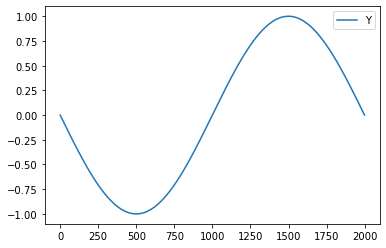

In [27]:
plt.plot(y, label="Y")
plt.legend();

## Autograd

Create random Tensors for weights. For a third order polynomial, we need

4 weights: `y = a + b x + c x^2 + d x^3`


In [28]:
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

In [29]:
# Set learning rate 
learning_rate = 1e-6

In [30]:
for t in range(5000):
    #Forward pass to calucalte yhat
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    # calculate mean square loss
    loss = (y_pred - y).pow(2).sum()
    # print loss every 100 steps
    if t % 100 == 99:
        print(t, loss.item())
    # calculate gradients with respect to the loss
    loss.backward()
    # update weights with nograd since weights already have requires_grad=True
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')   

99 3369.85986328125
199 2242.00634765625
299 1493.0869140625
399 995.6495971679688
499 665.1525268554688
599 445.5026550292969
699 299.47442626953125
799 202.358154296875
899 137.7471160888672
999 94.74514770507812
1099 66.11324310302734
1199 47.04124069213867
1299 34.331321716308594
1399 25.857147216796875
1499 20.204307556152344
1599 16.431442260742188
1699 13.911865234375
1799 12.228348731994629
1899 11.102754592895508
1999 10.349706649780273
2099 9.845547676086426
2199 9.507792472839355
2299 9.281351089477539
2399 9.12941837310791
2499 9.027389526367188
2599 8.958836555480957
2699 8.912731170654297
2799 8.881693840026855
2899 8.86077880859375
2999 8.846672058105469
3099 8.837149620056152
3199 8.830714225769043
3299 8.826356887817383
3399 8.823415756225586
3499 8.821416854858398
3599 8.820060729980469
3699 8.819140434265137
3799 8.818512916564941
3899 8.81808853149414
3999 8.817797660827637
4099 8.817598342895508
4199 8.817461967468262
4299 8.81736946105957
4399 8.817306518554688
44